In [1]:
import importlib
import sys
sys.path.append("../")
sys.path.append('../../../')
import explainers.GNNBoundary.gnn_boundary.models as models
from torch_geometric.data import Data
from utility_functions import *
import torch
#sys.path.append("./explainers/XGNN")
#sys.path.append("./graph_generation")
#import HouseSet as HouseSet
from XGNNInterface  import XGNNInterface

C:\Users\hanne\anaconda3\envs\gnnboundary\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
model = models.LinearGCNClassifier(hidden_channels = 16, node_features = 1, num_classes=2)

In [7]:
import os
cwd = os.getcwd()
file_path = os.path.abspath(os.path.join(cwd, '../../../model/report_models/counting.pt'))
model.load_state_dict(torch.load(file_path))

<All keys matched successfully>

In [9]:
mw = lambda x,e : model_wrapper(x,e,model=model)
encoding_dict = one_hot_encoding(1)
cgd = lambda nx_graph: convertNxToData(nx_graph, encoding_dict)

In [12]:
res = {0:[], 1:[]}
for cl in [0,1]:
    explainer = XGNNInterface(12, 30, cl, 1000, 1, model = mw,\
                                  convertNxToData = cgd,\
                                      checkpoint=False, reward_stepwise=0.3)
    graph,prob = explainer.train()
    res[cl] = (graph,prob)

Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model


In [13]:
res

{0: (Data(x=[10, 1], edge_index=[2, 17]), 0.8133496642112732),
 1: (Data(x=[1, 1], edge_index=[2, 0]), 0.0022216506768018007)}

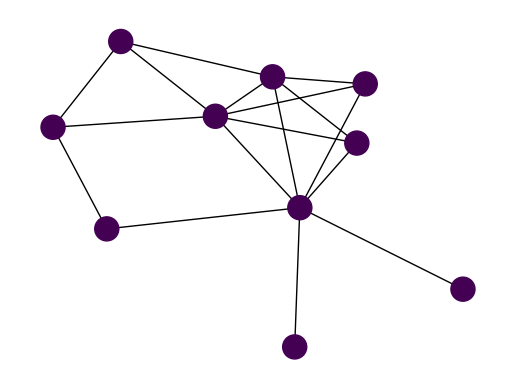

In [15]:
printGraph(res[0][0],"./images/counting_cl0")

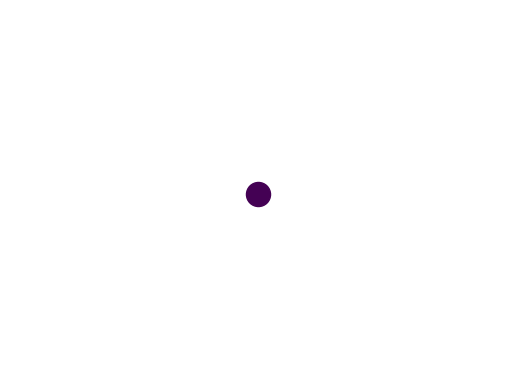

In [16]:
printGraph(res[1][0],"./images/counting_cl1")